In [1]:
from ni_eeg_forward_project.util import get_labels_of_points, plot_glassbrain_projections
from ni_eeg_forward_project.util import downsample_leadfield_matrix
import mne
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from neurolib.utils.collections import dotdict
import numpy as np

In [2]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif"
fwd = mne.read_forward_solution(fname)

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (14629 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [3]:
print(fwd.keys())
fwd['src'][0].keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])


dict_keys(['id', 'type', 'shape', 'src_mri_t', 'mri_ras_t', 'vox_mri_t', 'mri_width', 'mri_height', 'mri_depth', 'mri_volume_name', 'neighbor_vert', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [3]:
lh = fwd['src'][0]
dip_pos = lh['rr'][lh['vertno']]  # The position of the dipoles
dip_ori = lh['nn'][lh['vertno']]
print(dip_pos.shape)
print(dip_ori.shape)
print(np.sum(dip_ori[0,:]))

(14629, 3)
(14629, 3)
1.0552237090596464


In [38]:
leadfield = fwd['sol']['data']
leadfield.shape

(94, 43887)

In [10]:
# dip_pos = dip_pos*1e3   # ARE COORDINATES DEFINED IN m IN MNE???

In [6]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos*1e3, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

ERROR:root:The atlas does not specivy valid labels for all the given points.
Total number of points: (14629) out of which (14236) were validly assigned.


Not all sources were assigned to regions.
(14629,)


In [14]:
not_found_indices = np.where(np.array(points_found) == False)

In [15]:
not_found_indices[0].shape

(393,)

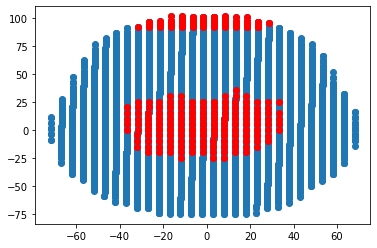

In [16]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')
plt.plot(dip_pos[not_found_indices[0], 0], dip_pos[not_found_indices[0], 1], 'ro')

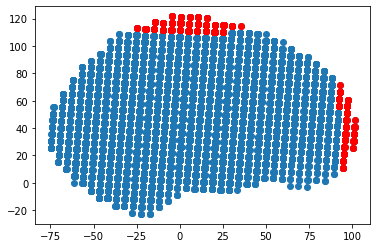

In [17]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')
plt.plot(dip_pos[not_found_indices[0], 1], dip_pos[not_found_indices[0], 2], 'ro')

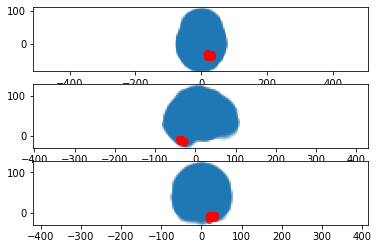

In [22]:
plot_glassbrain_projections(fwd, label_codes, 4112, "");

### Why are there three times as many columns as there are dipoles and how are the dipoles sorted?

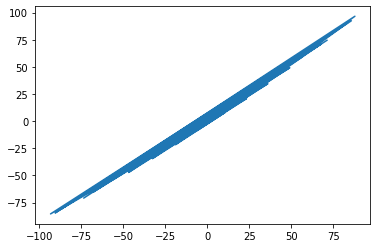

In [11]:
plt.plot(leadfield[:, 0], leadfield[:, 3])

In [21]:
print(np.dot(leadfield[:, 0], leadfield[:, 0]))
print(np.dot(leadfield[:, 0], leadfield[:, 1]))
print(np.dot(leadfield[:, 0], leadfield[:, 2]))
print(np.dot(leadfield[:, 0], leadfield[:, 3]))
print(np.dot(leadfield[:, 0], leadfield[:, 4]))

163186.72
3916.299
-1498.74
163503.4
-6487.4355


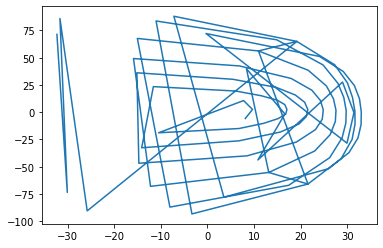

In [19]:
plt.plot(leadfield[:, 2], leadfield[:, 0])

### Assign dipoles-xyz to regions

In [7]:
np.unique(label_codes)

array([   0., 2001., 2002., 2101., 2102., 2201., 2202., 2301., 2302.,
       2311., 2312., 2321., 2322., 2331., 2332., 2401., 2402., 2601.,
       2602., 2611., 3001., 3002., 4001., 4002., 4011., 4012., 4021.,
       4022., 4101., 4102., 4111., 4112., 5001., 5002., 5011., 5012.,
       5021., 5022., 5101., 5102., 5201., 5202., 5401., 5402., 6001.,
       6002., 6101., 6102., 6201., 6202., 6211., 6212., 6221., 6222.,
       6301., 6302., 6401., 6402., 7001., 7002., 7011., 7012., 7021.,
       7022., 7101., 7102., 8101., 8102., 8111., 8112., 8121., 8122.,
       8201., 8202., 8301., 8302., 9021., 9022., 9031., 9032., 9110.,
       9120.,   nan])

In [13]:
np.where(label_codes == np.unique(label_codes)[2])[0]

array([ 2495,  2522,  3134,  3135,  3162,  3786,  3787,  3788,  3789,
        3790,  3791,  3815,  3816,  3817,  3818,  3819,  3847,  4532,
        4533,  4534,  4535,  4536,  4537,  4562,  4563,  4564,  4565,
        4566,  4592,  4593,  4594,  4595,  5236,  5265,  5294,  5295,
        5322,  5323,  5324,  5325,  5326,  5327,  5353,  5354,  5355,
        5356,  5381,  5382,  5383,  5384,  5412,  6009,  6010,  6011,
        6012,  6036,  6037,  6038,  6039,  6040,  6066,  6067,  6068,
        6094,  6095,  6096,  6097,  6098,  6124,  6125,  6126,  6127,
        6128,  6154,  6155,  6156,  6157,  6183,  6184,  6185,  6212,
        6213,  6809,  6810,  6811,  6812,  6836,  6837,  6838,  6839,
        6863,  6864,  6865,  6866,  6867,  6868,  6890,  6891,  6892,
        6893,  6894,  6895,  6896,  6920,  6921,  6922,  6923,  6924,
        6950,  6951,  6952,  6980,  6981,  7570,  7571,  7597,  7598,
        7599,  7624,  7625,  7626,  7627,  7650,  7651,  7652,  7653,
        7654,  8346,

In [16]:
2331 in np.unique(label_codes)

True

In [21]:
test_arr1 = np.array([1,2,3,np.inf])
test_arr2 = np.array([1,2,3,np.NINF])
test_arr3 = np.array([1,2,3,np.nan])

In [22]:
print(np.isnan(np.min(test_arr1)))
print(np.isnan(np.min(test_arr2)))
print(np.isnan(np.min(test_arr3)))

False
False
True


In [32]:
np.delete(test_arr2,np.where(test_arr2 == 0)[0])

array([  1.,   2.,   3., -inf])

In [29]:
np.delete(test_arr2,np.where(np.isnan(test_arr2))[0])

array([  1.,   2.,   3., -inf])

### Test downsampling

In [34]:
ds_everything = downsample_leadfield_matrix(leadfield, label_codes)

In [37]:
ds_everything[2]

array([[ 68.61825562,  52.39718628, 111.71192932, ...,  28.78284454,
         32.81113434,  34.81182861],
       [ 63.24255753,  60.60943604, 107.2014389 , ...,  29.20792198,
         33.11088562,  35.38224411],
       [ 54.73020935,  66.03462982,  91.07171631, ...,  29.1109848 ,
         32.76096344,  35.15696335],
       ...,
       [-15.80848217, -33.06074524, -23.08837128, ..., -17.83277893,
         -8.65104771,  -0.67061156],
       [ -4.87483072,  -3.58199835, -21.35296822, ...,  11.62473106,
         12.79399204,  13.20175076],
       [ -3.82268023,  -2.1142087 ,  -9.09934425, ...,   3.98162389,
          8.407897  ,  13.33716393]])

In [40]:
print(np.min(leadfield), np.max(leadfield), np.mean(leadfield))

-696.64154 667.87744 2.6326315


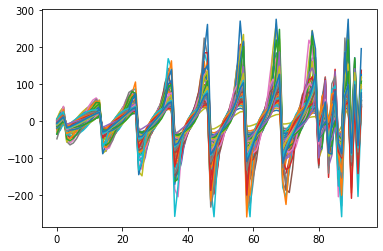

In [50]:
plt.plot(ds_everything[1])

In [44]:
# np.save("x_orientation", ds_everything[0])
# np.save("y_orientation", ds_everything[1])
# np.save("z_orientation", ds_everything[2])

In [52]:
subject_dir = "../../data/datasets/eeg_fsaverage"
subject = 'fsaverage'
subjects_dir = None
trans = 'fsaverage' #TODO: understand what does trans = 'fsaverage' do

In [55]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subjects_dir, trans=trans, fwd=fwd,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)

# Would be cool if only not 0 and not NAN dipoles were plotted, but here it looks like many are outside.

### Visualize fixed orientation

In [56]:
dip_len = len(dip_pos)
dip_times = [0]
white = (1.0, 1.0, 1.0)  # RGB values for a white color

actual_amp = np.ones(dip_len)  # misc amp to create Dipole instance
actual_gof = np.ones(dip_len)  # misc GOF to create Dipole instance
dipoles = mne.Dipole(dip_times, dip_pos, actual_amp, dip_ori, actual_gof)